<a href="https://colab.research.google.com/github/kylewon0102/stockPricePrediction/blob/main/stockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
import matplotlib.pyplot as plt
from datetime import datetime

# 1. Stocks Class: Manages stock data
class Stocks:
    def __init__(self, name, start_date=None, end_date=None):
        self.name = name
        # If no start_date or end_date provided, default to last 3 years
        self.start_date = start_date if start_date else (datetime.now() - pd.DateOffset(years=3)).strftime('%Y-%m-%d')
        self.end_date = end_date if end_date else datetime.now().strftime('%Y-%m-%d')
        self.data = None

    def get_data(self):
        """Returns the stock data"""
        self.data = yf.download(self.name, start=self.start_date, end=self.end_date)
        self.data = self.data[['Close']]  # Focus on closing price
        self.data['Next_Close'] = self.data['Close'].shift(-1)  # Target: Next day's close price
        self.data.dropna(inplace=True)
        return self.data

    def change_data(self, start_date, end_date):
        """Change the date range and reload data"""
        self.start_date = start_date
        self.end_date = end_date
        return self.get_data()  # Reload data with new date range

# 2. Train Class: Manages training models and predictions
class Train:
    def __init__(self, stock_data):
        self.stock_data = stock_data  # Stock data passed in from Stocks class
        self.model = None

    def train_model_linearRegression(self):
        """Train a linear regression model"""
        X = self.stock_data[['Close']].values
        y = self.stock_data['Next_Close'].values
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Linear Regression model
        self.model = LinearRegression()
        self.model.fit(X_train, y_train)
        return self.model

    def train_model_multiRegression(self):
        """Train a multiple regression model (e.g., with more features)"""
        # Example of adding more features: moving average
        self.stock_data['Moving_Avg'] = self.stock_data['Close'].rolling(window=5).mean()
        self.stock_data.dropna(inplace=True)  # Drop NaN rows after adding the moving average

        X = self.stock_data[['Close', 'Moving_Avg']].values  # Now using both 'Close' and 'Moving_Avg'
        y = self.stock_data['Next_Close'].values
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Multiple Regression model (e.g., Ridge regression)
        self.model = Ridge()  # You can use Lasso or ElasticNet, depending on your needs
        self.model.fit(X_train, y_train)
        return self.model

    def predict_linear(self):
        """Make a prediction using the linear regression model"""
        if self.model is None or not isinstance(self.model, LinearRegression):
            raise ValueError("Linear Regression model has not been trained yet!")

        latest_close = self.stock_data['Close'].iloc[-1]  # Get latest closing price
        predicted_next_close = self.model.predict([latest_close])
        return predicted_next_close[0]

    def predict_multi(self):
        """Make a prediction using the multiple regression model"""
        if self.model is None or not isinstance(self.model, Ridge):  # Adjust if using other models
            raise ValueError("Multiple Regression model has not been trained yet!")

        latest_close = self.stock_data['Close'].iloc[-1]
        latest_moving_avg = self.stock_data['Moving_Avg'].iloc[-1]

        predicted_next_close = self.model.predict([[latest_close, latest_moving_avg]])
        return predicted_next_close[0]

    def getPrediction(self):
        """Returns the prediction depending on the trained model"""
        if isinstance(self.model, LinearRegression):
            return self.predict_linear()
        elif isinstance(self.model, Ridge):
            return self.predict_multi()
        else:
            raise ValueError("No valid model has been trained yet!")

# 3. Plot Class: Handles plotting of the stock data
class Plot:
    def __init__(self, name, stock_data, prediction):
        self.name = name
        self.stock_data = stock_data
        self.prediction = prediction

    def plot_stock_data(self):
        """Plots the historical data and predicted next closing price"""
        plt.figure(figsize=(14, 7))
        plt.plot(self.stock_data.index, self.stock_data['Close'], label='Historical Close Prices', color='blue')

        # Plot the predicted next closing price
        plt.scatter(self.stock_data.index[-1], self.prediction, color='red', label='Predicted Next Close', zorder=5)

        # Annotate the predicted value
        plt.annotate(f'${self.prediction:.2f}',
                     (self.stock_data.index[-1], self.prediction),
                     textcoords="offset points",
                     xytext=(0, 10),
                     ha='center',
                     fontsize=12,
                     color='red')

        plt.title(f'{self.name} Stock Price')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.legend()
        plt.grid()
        plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


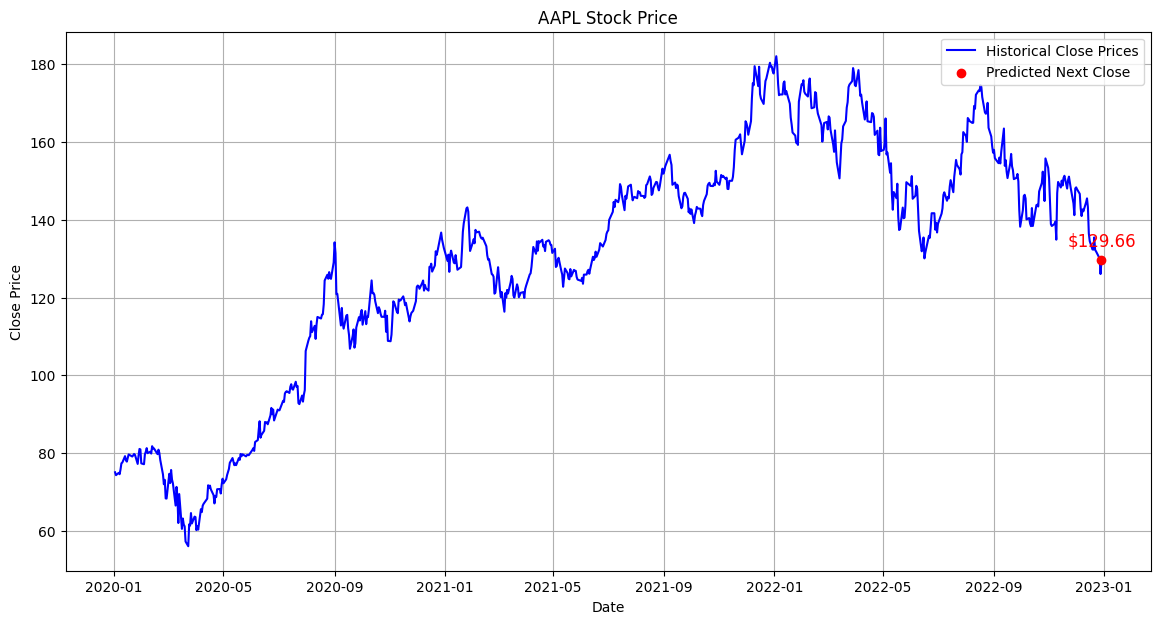

In [ ]:
# Example of how to use the classes:

# Step 1: Load stock data (Stocks class)
apple = Stocks(name='AAPL', start_date='2020-01-01', end_date='2023-01-01')


# Step 2: Train the model (Train class)
trainer = Train(apple.get_data())
trainer.train_model_linearRegression()  # Or use train_model_multiRegression()
predicted_next_close = trainer.getPrediction()  # Get the prediction

# Step 3: Plot the stock data and prediction (Plot class)
plotter = Plot(apple.name, apple.get_data(), predicted_next_close)
plotter.plot_stock_data()


In [ ]:
#testcase
data2 = yf.download(symbol, start='2023-01-02', end='2023-01-05')
data2 = data2[['Close']]
data2

[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2023-01-03 00:00:00+00:00,125.070000
2023-01-04 00:00:00+00:00,126.360001
